In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.stats import norm

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SEED = 350107321 # from random.org
np.random.seed(SEED)

print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
# the plan is to simulate intensity distribution by using a Poisson distribution
# over a small area.  The first thing that we have to figure out is over which length
# a normal distribution will be non-zero given double resolution
w = 1 # is the way the Gaussian width is defined in optics
sigma = w/2
ep = 1.0
x = np.linspace(-20,20,200)
intensity = ep*sigma*np.sqrt(2*np.pi)*norm.pdf(x, loc=0,scale=sigma)
#print(intensity)
print(x[1],x[-2])

-19.798994974874372 19.798994974874375


In [3]:
# set limits and define the length of the box
xlim1 = x[1]
xlim2 = x[-2]
L = xlim2-xlim1
print(L)

39.59798994974875


In [4]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 5
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

157.97312409865782


In [5]:
N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
int_list = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws]
int_list = np.array(int_list)

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys


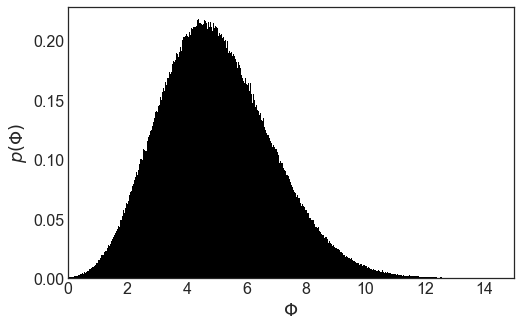

In [22]:
plt.figure(figsize=(8,5))
_ = plt.hist(int_list,bins=500,density=True,color="k")
#plt.ylim((0,1))
plt.xlim((0,15))
plt.xlabel(r"$\Phi$")
plt.ylabel(r"$p(\Phi)$")
plt.savefig("OneDN5.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN5.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [23]:
int_list.mean()
np.savetxt("5.csv",int_list, delimiter=",")

In [8]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 2
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

N_samples = 1000000
N_draws2 = np.random.poisson(N_avg_L,N_samples)
int_list2 = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws2]
int_list2 = np.array(int_list2)

63.18924963946313


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  if __name__ == '__main__':


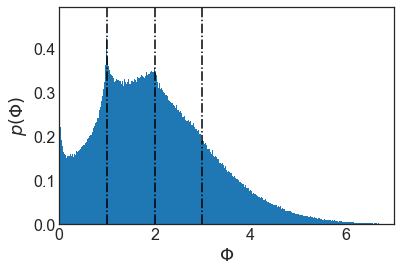

In [19]:
_ = plt.hist(int_list2,bins=500,density=True)
#plt.ylim((0,1))
plt.xlim((0,7))
plt.xlabel(r"$\Phi$")
plt.ylabel(r"$p(\Phi)$")
plt.axvline(x=1,linestyle="-.",color="k")
plt.axvline(x=2,linestyle="-.",color="k")
plt.axvline(x=3,linestyle="-.",color="k")
plt.savefig("OneDN2.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN2.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [25]:
print(int_list2.mean())
np.savetxt("2.csv",int_list2, delimiter=",")

1.9999936939901426


In [10]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 1
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

N_samples = 1000000
N_draws1 = np.random.poisson(N_avg_L,N_samples)
int_list1 = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws1]
int_list1 = np.array(int_list1)

31.594624819731564


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  


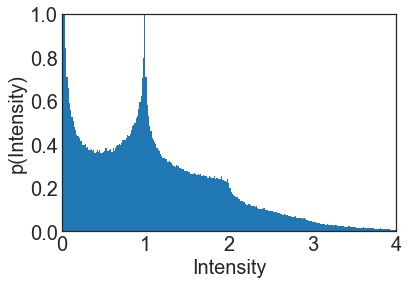

In [11]:
_ = plt.hist(int_list1,bins=500,density=True)
plt.ylim((0,1))
plt.xlim((0,4))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("OneDN1.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN1.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [26]:
print(int_list1.mean())
np.savetxt("1.csv",int_list1, delimiter=",")

1.0000801039437879


In [12]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 0.5
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

N_samples = 1000000
N_draws05 = np.random.poisson(N_avg_L,N_samples)
int_list05 = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws05]
int_list05 = np.array(int_list05)

15.797312409865782


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  


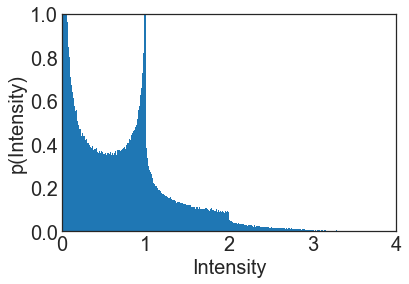

In [13]:
_ = plt.hist(int_list05,bins=500,density=True)
plt.ylim((0,1))
plt.xlim((0,4))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("OneDN05.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN05.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [27]:
print(int_list05.mean())
np.savetxt("05.csv",int_list05, delimiter=",")

0.49991315214796184


In [14]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 0.2
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

N_samples = 1000000
N_draws02 = np.random.poisson(N_avg_L,N_samples)
int_list02 = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws02]
int_list02 = np.array(int_list02)

6.318924963946313


/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  


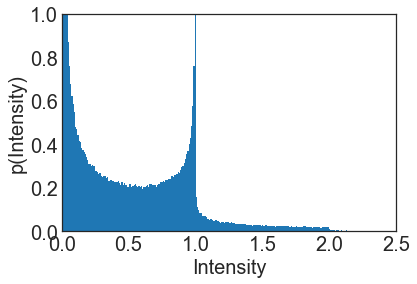

In [15]:
_ = plt.hist(int_list02,bins=500,density=True)
plt.ylim((0,1))
plt.xlim((0,2.5))
plt.xlabel("Intensity")
plt.ylabel("p(Intensity)")
plt.savefig("OneDN02.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")
#plt.savefig("OneDN02.pdf",format='pdf',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [28]:
print(int_list02.mean())
np.savetxt("02.csv",int_list02, delimiter=",")

0.20053509421299998
